# Setup

In [86]:
import numpy as np
import cv2
import math
import os
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm

# Functions

In [87]:
def create_guassian_filter(sigma):
    size = int(math.floor(8*sigma+1))
    if (size % 2 == 0):
        # Size is even, make odd
        size += 1

    kernel = np.zeros((size, size))

    cum_sum = 0
    x_range = int((size - 1) / 2)
    y_range = int((size - 1) / 2)

    for x in range(-x_range, x_range + 1):
        for y in range(-y_range, y_range + 1):
            kernel[y + y_range][x + x_range] = (math.exp(-((x * x) + (y * y)) / (2 * sigma * sigma))) / (2 * math.pi * sigma * sigma)
            cum_sum += kernel[y + y_range][x + x_range]

    for x in range(-x_range, x_range + 1):
        for y in range(-y_range, y_range + 1):
            kernel[y + y_range][x + x_range] /= cum_sum

    return kernel

In [88]:
def perform_numpy_convolution(image: np.ndarray, template: np.ndarray):
    # Flip the template around both axes
    inverted_template = np.flip(template)

    if (image.ndim == 3):
        # Color image
        x, y = len(image), len(image[0])
        offset = int((len(template) - 1) / 2)

        print(np.shape(image))
        padded_image = np.pad(image, [offset, offset], 'constant', constant_values=[0, 0])
        print(np.shape(padded_image))

        out = np.zeros((x, y))
        for row in tqdm(range(0+offset, x+offset)):
            for column in range(0+offset, y+offset):
                section = np.array(padded_image[row-offset:row+offset+1,column-offset:column+offset+1])
                print(section)
                out[row-offset][column-offset] = np.sum(np.multiply(section, inverted_template))

        return out

    else:
        # Grayscale Image
        x, y = len(image), len(image[0])
        offset = int((len(template) - 1) / 2)

        padded_image = np.pad(image, [offset, offset], 'constant', constant_values=[0, 0])

        out = np.zeros((x, y))
        for row in tqdm(range(0+offset, x+offset)):
            for column in range(0+offset, y+offset):
                section = np.array(padded_image[row-offset:row+offset+1,column-offset:column+offset+1])
                out[row-offset][column-offset] = np.sum(np.multiply(section, inverted_template))

        return out

# Generate Guassian Kernel

In [89]:
# Create the guassian kernel
guassian_filter_matrix = create_guassian_filter(sigma=8)

# Low Pass Filtering

In [90]:
# Create the path to the image
IMG_1_PATH = os.path.join(os.path.abspath('../'), 'data', 'cat.bmp')

img_1 = cv2.imread(IMG_1_PATH) # Read the image file
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)


In [91]:
low_pass_image = perform_numpy_convolution(img_1, guassian_filter_matrix)

100%|██████████| 361/361 [00:03<00:00, 92.92it/s]


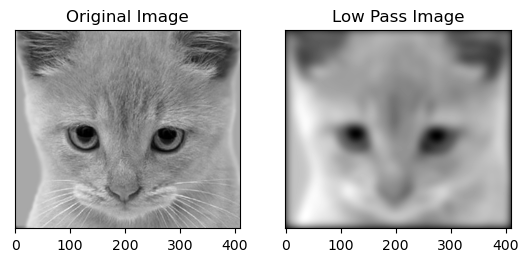

In [92]:
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.title('Original Image')
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Low Pass Image')
plt.yticks([])

plt.show()

# High Pass Filtering

In [93]:
# Create the path to the image
IMG_2_PATH = os.path.join(os.path.abspath('../'), 'data', 'dog.bmp')

img_2 = cv2.imread(IMG_2_PATH) # Read the image file
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

In [94]:
high_pass_image = img_2 - perform_numpy_convolution(img_2, guassian_filter_matrix)

100%|██████████| 361/361 [00:04<00:00, 88.76it/s]


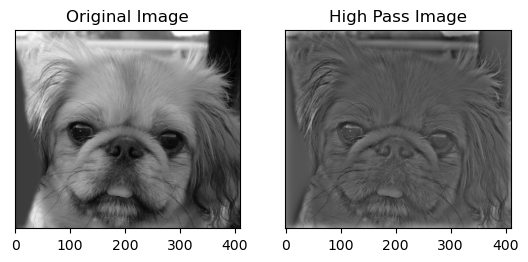

In [95]:
plt.subplot(1, 2, 1)
plt.imshow(img_2, cmap='gray')
plt.title('Original Image')
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(high_pass_image, cmap='gray')
plt.title('High Pass Image')
plt.yticks([])

plt.show()

# Create hybrid Image

In [96]:
hybrid_image = low_pass_image + high_pass_image

([], [])

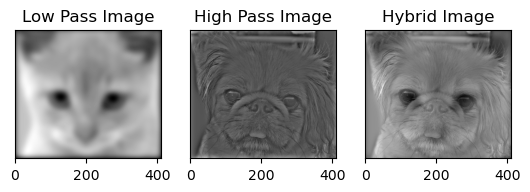

In [97]:
plt.subplot(1, 3, 1)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Low Pass Image')
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(high_pass_image, cmap='gray')
plt.title('High Pass Image')
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image')
plt.yticks([])